# Exploratory Analysis Step (Etapa da Análise Exploratória)
## Table of Contents
* [Packages](#1)
* [Plot Functions](#2)
    * [Get Pairs](#2.1)
    * [Plot Histogram](#2.2)
    * [Plot History](#2.3)
* [Exploratory Data Analysis](#3)
    * [Curse of Dimensionality](#3.1)
        * [PCA](#3.1.1)

<a class="anchor" id="1"></a>
## Packages (Pacotes)
**[EN-US]**

Packages used in the system.
* [pandas](https://pandas.pydata.org/): is the main package for data manipulation;
* [numpy](www.numpy.org): is the main package for scientific computing;
* [random](https://docs.python.org/pt-br/3/library/random.html): pseudorandom number generator for various distributions;
* [scikit-learn](https://scikit-learn.org/stable/): open source machine learning library;
* [matplotlib](http://matplotlib.org): is a library to plot graphs;
* [seaborn](https://seaborn.pydata.org/): data visualization library based on matplotlib;
* [plotly](https://plotly.com/python/): makes interactive, publication-quality graphs.

**[PT-BR]**

Pacotes utilizados no sistema.
* [pandas](https://pandas.pydata.org/): é o principal pacote para manipulação de dados;
* [numpy](www.numpy.org): é o principal pacote para computação científica;
* [random](https://docs.python.org/pt-br/3/library/random.html): gerador de números pseudoaleatórios para várias distribuições;
* [scikit-learn](https://scikit-learn.org/stable/): biblioteca open-source de machine learning;
* [matplotlib](http://matplotlib.org): é uma biblioteca para plotar gráficos;
* [seaborn](https://seaborn.pydata.org/): biblioteca de visualização de dados baseada em matplotlib;
* [plotly](https://plotly.com/python/): cria gráficos interativos com qualidade de publicação.

In [71]:
import pandas as pd
import numpy as np
import numpy.ma as ma
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15) # set default size of plots (definindo o tamanho padrão dos plots)
import seaborn as sns
import plotly.express as px

<a name="2"></a>
## Plot Utility Functions (Funções Utilitárias de Gráficos)
**[EN-US]**

Utility functions for plots. The `get_pairs` function returns 25 random unique pairs of features, the `plot_hist_vs` function plots a histogram comparing 2 labels from a dataset with numeric features, the `plot_loss` function plots the evaluation metric and the loss during model training.

**[PT-BR]**

Funções utilitárias para os plots. A função `get_pairs` retorna 25 pareas únicos aleatórios de features, a função `plot_hist_vs` plota um histograma comparando 2 labels de um dataset com features numéricas, a função `plot_loss` plota a métrica de avaliação e a loss durante o treinamento do modelo.

<a name="2.1"></a>
### Get Pairs (Pega os Pares)
**[EN-US]**

Randomly returns 25 unique pairs of features.

**[PT-BR]**

Retorna aleatoriamente 25 pares únicos de features.

In [74]:
def get_pairs(df):
    """
    [EN-US]
    The input is a DataFrame and returns a list of unique pairs of features from that DataFrame.
    
    [PT-BR]
    A entrada é um DataFrame e retorna uma lista com pares únicos de features desse DataFrame.
    
    Argument:
        df -- DataFrame to randomly get 25 unique pairs of your features
              (DataFrame para pegar aleatóriamente 25 pares únicos de suas features).
    
    Returns:
        pairs -- List with unique pairs of DataFrame features
                 (Lista com pares únicos de features do DataFrame).
    """
    # Empty list to store tuples with pairs (Lista vazia para armazenar os as tuplas com os pares).
    pairs = []

    for i in range(25):
        # Selecting the first feature (Selecionando a primeira feature).
        x = df.columns[randint(0,12)]
        # Selecting the second feature (Selecionando a segunda feature).
        y = df.columns[randint(0,12)]
        # Loop to not select the 2nd feature repeated or equal to the first feature
        # (Loop para não selecionar a 2 feature repetida ou igual a primeira feature).
        while x == y or (x, y) in pairs or (y, x) in pairs:
            y = df.columns[randint(0,12)]
        pairs.append((x, y))
    
    return pairs

<a name="2.2"></a>
### Plot Histogram (Plota Histograma)
**[EN-US]**

Returns a histogram comparing a feature between 2 labels.

**[PT-BR]**

Retorna um histograma comparando uma feature entre 2 classes.

In [76]:
def plot_hist_vs(X):
    """
    [EN-US]
    Returns a histogram comparing the distribution of numeric features between the positive and negative class.
    
    [PT-BR]
    Retorna um histograma comparando a distribuição das features numéricas entre a classe positiva e negativa.
    
    Argument:
        X -- X matrix (Matriz X).
    """
    # Excluding categorical features (Excluindo as features categóricas).
    X = X.drop(columns=['name', 'artists', 'duration_ms', 'mode']).copy()
    # Selecting the positive class (Selecionando a classe positiva).
    label_1 = X[X['y'] == 1].drop(columns=['y']).copy()
    # Selecting the negative class (Selecionando a classe negativa).
    label_0 = X[X['y'] == 0].drop(columns=['y']).copy()

    # Creating the figure for the plot (Criando a figura para o plot).
    fig, axs = plt.subplots(4, 3, figsize=(12, 6))
    i = 0

    # Going through each line of the axis (Percorrendo cada linha do eixo).
    for rows in axs:
        # Going through each element of the line (Percorrendo cada elemento da linha),
        for ax in rows:
            # Creating the plot for each feature (Criando o plot para cada feature).
            title = label_1.columns[i].capitalize()
            ax.hist(label_1[label_1.columns[i]].to_list(), bins=100, color='b', label='Good')
            ax.hist(label_0[label_0.columns[i]].to_list(), bins=100, color='r', alpha=0.7, label='Bad')
            ax.set_title(title)
            i += 1
            if i == 12:
                break
    plt.legend(loc='best')
    plt.show()

<a name="2.3"></a>
### Plot History (Plota o Histórico)
**[EN-US]**

Returns a plot with the metric and loss of the model during the training epochs.

**[PT-BR]**

Retorna um plot com a métrica e o loss do modelo durante as epochs de treinamento.

In [78]:
def plot_history(history):
    """
    [EN-US]
    Plots the history of the model's training loss and metrics by epoch.
    
    [PT-BR]
    Plota o histórico da loss e da métrica do treinamento do model por epoch.

    Argument:
        history -- history returned by model training (histórico retornado pelo treino do modelo).
    """
    # Accessing the vector with the loss history (Acessando o vetor com o histórico da loss)
    loss = history.history['loss']
    # Accessing the vector with the metric history (Acessando o vetor com o histórico da métrica)
    metric = history.history['auc']
    # Selecting the number of epochs (Selecionando a quantidade de epochs)
    epochs = range(len(loss))
    # Defining the list with the values to plot (Definindo a lista com os valores para plotar)
    utils = [loss, 'loss'], [metric, 'auc']
    
    # Defining the figure and creating the plots (Definindo a figura e criando os plots)
    fig, ax = plt.subplots(2, 2, figsize=(12, 6))
    for i in range(2):
        fig.suptitle('Performance per Epoch')
        # Plotting with all epochs (Plotando com todas as epochs)
        ax[i, 0].plot(epochs, utils[i][0], color='g')
        ax[i, 0].set_ylabel(utils[i][1])
        ax[i, 0].set_xlabel('epochs')
    
        # Plotting only the final 25% of the epoch (PLotando apenas os 25% final da epoch) 
        ax[i, 1].plot(epochs, utils[i][0], color='g')
        ax[i, 1].set_xlim(int((len(utils[i][0]) * .75)), len(utils[i][0]))
        ax[i, 1].set_xlabel('epochs')
    plt.show()

<a name="3"></a>
## Exploratory Data Analysis (EDA)
**[EN-US]**

Exploratory Data Analysis.

Input $X$ features:
* `id`: the Spotify ID for the track.
* `name`: the name of the track.
* `artists`: the principal artist who performed the track.
* `duration_ms`: the track length in milliseconds.
* `popularity`: a measure from 0 to 100 describing the popularity of the track.
* `danceability`: a measure from 0.0 to 1.0 describing how suitable a track is for dancing.
* `energy`: a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* `key`: the key the track is in. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* `loudness`: the overall loudness of a track in decibels (dB). Values typically range between -60 and 0 db.
* `mode`: indicates the modality, major "1" or minor "0", of a track.
* `speechiness`: a measure from 0.0 to 1.0 detecting the presence of spoken words in a track.
* `acousticness`: a confidence measure from 0.0 to 1.0 of whether the track is acoustic.
* `instrumentalness`: a measure from 0.0 to 1.0 predicting whether a track contains no vocals.
* `liveness`: a mearure from 0.0 to 1.0 detecting the presence of an audience in the recording.
* `valence`: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
* `tempo`: the overall estimated tempo of a track in beats per minute (BPM).
* `y`: the track's label, 1 for good and 0 otherwise.
* `duration_min`: the track length in minutes.

**[PT-BR]**

Análise de Dados Exploratória.

Variáveis do input $X$:
* `id`: o ID do Spotify para a track.
* `name`: o nome da track.
* `artists`: o artista principal que executaram a faixa.
* `duration_ms`: a duração da track em milissegundos.
* `popularity`: uma medida de 0 a 100 que descreve a popularidade da track.
* `danceability`: uma medida de 0,0 a 1,0 que descreve o quão adequada uma track é para dançar.
* `energy`: uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade.
* `key`: o tom em que a track está. 0 = C, 1 = C♯/D♭, 2 = D e assim por diante. Se nenhuma chave for detectada, o valor será -1.
* `loudness`: o volume geral de uma track em decibéis (dB). Os valores normalmente variam entre -60 e 0 db.
* `mode`: indica a modalidade, maior "1" ou menor "0", de uma track.
* `speechiness`: medida de 0,0 a 1,0 que detecta a presença de palavras faladas em uma track.
* `acousticness`: uma medida de confiança de 0,0 a 1,0 para saber se a track é acústica.
* `instrumentalness`: uma medida de 0,0 a 1,0 que prevê se uma track não contém vocais.
* `liveness`: detecta a presença de um público na gravação.
* `valence`: uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma track.
* `tempo`: o andamento geral estimado de uma track em batidas por minuto (BPM).
* `y`: o label da track, 1 para bom e 0 para caso contrário.
* `duration_min`: a duração da track em minutos.

Reading datasets from the `../data/raw/` directory (Lendo os datasets do diretório `../data/raw/`).

In [81]:
good_df = pd.read_csv('../data/raw/df_good.csv')
#good_2_df = pd.read_csv('./data/df_good_2.csv')
bad_df = pd.read_csv('../data/raw/df_bad.csv').drop(columns=['name'])
good_df.head()

,id,name,artists,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,y,duration_min
0,1XNdu4czbxZ9tdVOhDtI4M,Cheia de Manias,Raça Negra,211000,51,0.707,0.614,7,-9.377,0,0.0580,0.198,0.000000,0.1770,0.957,156.473,1,3.516667
1,1SaeGiWS1LQhfRc6ObQfvq,Que Se Chama Amor,Só Pra Contrariar,245200,0,0.647,0.528,7,-12.739,1,0.0409,0.411,0.000000,0.0481,0.621,136.118,1,4.086667
2,6jBZxE0VZpmgZud4L5lo0u,Paparico,Molejo,220426,53,0.738,0.850,9,-7.278,1,0.0756,0.530,0.000000,0.2130,0.967,88.799,1,3.673767
3,43uHeQc9kdMzFAbxCTcgiI,Telegrama,Exaltasamba,219866,54,0.517,0.516,11,-12.441,1,0.0342,0.443,0.000004,0.2360,0.601,151.060,1,3.664433
4,4tILvSk9XcdCBzjyzhsuze,É Tarde Demais,Raça Negra,214693,50,0.615,0.403,4,-11.648,1,0.0282,0.425,0.000004,0.3210,0.454,136.377,1,3.578217


Dropping duplicate examples (Dropando os exemplos duplicados).

In [83]:
good_df = good_df.drop_duplicates()
bad_df = bad_df.drop_duplicates()

Analyzing the distribution of the `artists` feature for each dataset, the good and the bad (Analisando a distribuição da feature `artists` para cada dataset, o good e o bad).

In [85]:
good_df['artists'].value_counts().sort_values(ascending=False).head(10)

artists
Iron Maiden           40
System Of A Down      34
Alanis Morissette     14
Mamonas Assassinas    13
Phoenix               12
ANGRA                 11
The Offspring          8
The Kooks              8
Måneskin               7
Foo Fighters           7
Name: count, dtype: int64

In [86]:
bad_df['artists'].value_counts().sort_values(ascending=False).head(10)

artists
Mc 7 Belo                 16
Mc Brisola                 7
Mc Magrinho                7
Mc Kitinho                 6
Mc Neguinho do ITR         6
MC Vitinho Avassalador     6
Mc Talibã                  5
MC Timbu                   5
Os Cretinos                5
Mc Gw                      5
Name: count, dtype: int64

In [87]:
print(f'Total tracks in the good playlist: {good_df.shape[0]}\nTotal tracks in the bad playlist: {bad_df.shape[0]}')

Total tracks in the good playlist: 614
Total tracks in the bad playlist: 368


In [88]:
print(f'Good playlist:\n\tAverage duration: {np.mean(good_df["duration_min"]):.2f}min\n\tAverage population: {np.mean(good_df["popularity"]):.1f}\n')

print(f'Bad playlist:\n\tAverage duration: {np.mean(bad_df["duration_min"]):.2f}min\n\tAverage population: {np.mean(bad_df["popularity"]):.1f}')

Good playlist:
	Average duration: 3.90min
	Average population: 40.9

Bad playlist:
	Average duration: 2.90min
	Average population: 9.3


Counting null values (Contando os valores nulos).

In [90]:
print('good_df:\n', good_df.isnull().sum(), '\n\nbad_df:\n', bad_df.isnull().sum())

good_df:
 id                  0
name                0
artists             0
duration_ms         0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
y                   0
duration_min        0
dtype: int64 

bad_df:
 id                  0
artists             0
duration_ms         0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
y                   0
duration_min        0
dtype: int64


**[EN-US]**

Performing descriptive analysis. Analyzing the distribution of each feature and its types. We perform descriptive analysis to help identify problems. For example, let's say we have a credit provision model, but we see a person who is 6 years old, who was indicated as the minimum age for our analysis. This cannot happen.

**[PT-BR]**

Executando a análise descritiva. Analisando a distribuição de cada feature e seus tipos. Fazemos a análise descritiva para ajudar identificar problemas. por exemplo, digamos que temos um modelo de disponibilização de crédito, mas vemos um pessoa de 6 anos, que foi apontada na idade mínima da nossa análise, isso não pode acontecer.

In [92]:
good_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,614.0,233741.218241,73043.475785,42466.000000,190502.750000,222993.000000,266190.000000,818693.000000
popularity,614.0,40.916938,28.302916,0.000000,3.000000,50.000000,64.000000,87.000000
danceability,614.0,0.508020,0.148325,0.144000,0.392000,0.509500,0.613500,0.893000
energy,614.0,0.722435,0.232200,0.029800,0.577000,0.799500,0.911000,0.997000
key,614.0,5.382736,3.475164,0.000000,2.000000,5.000000,9.000000,11.000000
loudness,614.0,-6.664011,3.022693,-20.232000,-8.475250,-6.024000,-4.491250,-1.359000
mode,614.0,0.672638,0.469633,0.000000,0.000000,1.000000,1.000000,1.000000
speechiness,614.0,0.066790,0.055165,0.024100,0.033900,0.047500,0.074175,0.485000
acousticness,614.0,0.200190,0.286902,0.000007,0.003182,0.037800,0.304250,0.982000
instrumentalness,614.0,0.032501,0.132386,0.000000,0.000000,0.000038,0.002658,0.962000


In [93]:
bad_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,368.0,173967.842391,40975.369025,51692.000000,145767.000000,167131.500000,196606.500000,457120.000000
popularity,368.0,9.309783,13.786291,0.000000,0.000000,2.000000,15.000000,58.000000
danceability,368.0,0.820122,0.114366,0.449000,0.748750,0.854500,0.909250,0.975000
energy,368.0,0.672614,0.171646,0.223000,0.555750,0.668500,0.804750,0.988000
key,368.0,5.434783,3.669758,0.000000,1.750000,6.000000,9.000000,11.000000
loudness,368.0,-4.386530,2.795738,-15.303000,-5.972250,-4.180500,-2.475000,1.642000
mode,368.0,0.616848,0.486817,0.000000,0.000000,1.000000,1.000000,1.000000
speechiness,368.0,0.224291,0.155694,0.031600,0.085825,0.201000,0.331250,0.909000
acousticness,368.0,0.319929,0.221838,0.000400,0.125750,0.291500,0.482000,0.910000
instrumentalness,368.0,0.009204,0.058904,0.000000,0.000000,0.000000,0.000110,0.887000


Analyzing the type of each feature and whether there are null values (Analisando o tipo de cada feature e se há valores nulos).

In [95]:
good_df.info(), bad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                614 non-null    object 
 1   name              614 non-null    object 
 2   artists           614 non-null    object 
 3   duration_ms       614 non-null    int64  
 4   popularity        614 non-null    int64  
 5   danceability      614 non-null    float64
 6   energy            614 non-null    float64
 7   key               614 non-null    int64  
 8   loudness          614 non-null    float64
 9   mode              614 non-null    int64  
 10  speechiness       614 non-null    float64
 11  acousticness      614 non-null    float64
 12  instrumentalness  614 non-null    float64
 13  liveness          614 non-null    float64
 14  valence           614 non-null    float64
 15  tempo             614 non-null    float64
 16  y                 614 non-null    int64  
 1

(None, None)

Creating the item's dataset `data` with the sets of each class (Criando o dataset `data` dos itens com os sets de cada classe).

In [97]:
data = pd.concat([good_df, bad_df], axis=0, ignore_index=True).fillna('explicit')
data.head()

,id,name,artists,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,y,duration_min
0,1XNdu4czbxZ9tdVOhDtI4M,Cheia de Manias,Raça Negra,211000,51,0.707,0.614,7,-9.377,0,0.0580,0.198,0.000000,0.1770,0.957,156.473,1,3.516667
1,1SaeGiWS1LQhfRc6ObQfvq,Que Se Chama Amor,Só Pra Contrariar,245200,0,0.647,0.528,7,-12.739,1,0.0409,0.411,0.000000,0.0481,0.621,136.118,1,4.086667
2,6jBZxE0VZpmgZud4L5lo0u,Paparico,Molejo,220426,53,0.738,0.850,9,-7.278,1,0.0756,0.530,0.000000,0.2130,0.967,88.799,1,3.673767
3,43uHeQc9kdMzFAbxCTcgiI,Telegrama,Exaltasamba,219866,54,0.517,0.516,11,-12.441,1,0.0342,0.443,0.000004,0.2360,0.601,151.060,1,3.664433
4,4tILvSk9XcdCBzjyzhsuze,É Tarde Demais,Raça Negra,214693,50,0.615,0.403,4,-11.648,1,0.0282,0.425,0.000004,0.3210,0.454,136.377,1,3.578217


In [98]:
print(f'Total tracks in the items dataset: {data.shape[0]}')

Total tracks in the items dataset: 982


Loading the concatenated dataset in the `../data/transformed/` directory (Carregando o dataset concatenado no diretório `../data/transformed/`).

In [100]:
data.to_csv('../data/transformed/data.csv', index=False)

Analyzing the distribution of some features (Analisando a distribuição de algumas features).

In [102]:
data['y'].value_counts()

y
1    614
0    368
Name: count, dtype: int64

In [103]:
data['key'].value_counts().sort_index()

key
0      90
1     112
2      96
3      29
4      84
5      73
6      80
7      99
8      59
9     122
10     48
11     90
Name: count, dtype: int64

In [104]:
data['mode'].value_counts().sort_index()

mode
0    342
1    640
Name: count, dtype: int64

In [105]:
data['artists'].value_counts().head(10)

artists
Iron Maiden           40
System Of A Down      34
Mc 7 Belo             16
Alanis Morissette     14
Mamonas Assassinas    13
Phoenix               12
ANGRA                 11
The Offspring          8
The Kooks              8
Foo Fighters           7
Name: count, dtype: int64

Plotting the comparison of the distribution between `label 1` (good track) and `label 0` (bad track) of the dataset of each numerical feature (Plotando a comparação da distribuição entre o `label 1` (good track) e o `label 0` (bad track) do dataset de cada feature numérica).

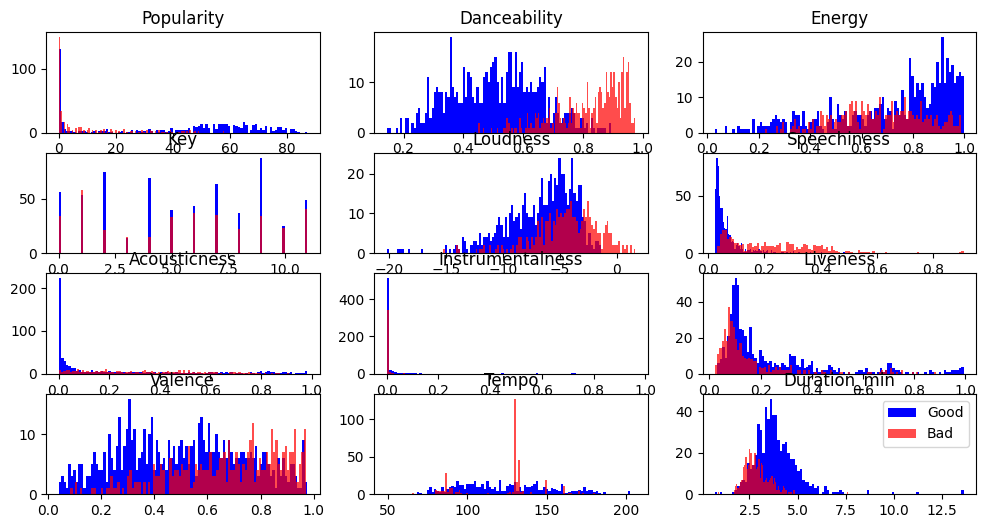

In [107]:
plot_hist_vs(data.drop(columns=['id']))

Creating a dataset with only numerical features (Criando um dataset apenas com as features numéricas).

In [109]:
data_num = data.drop(columns=['id', 'name', 'artists', 'y', 'duration_ms']).copy()
data_num.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,51,0.707,0.614,7,-9.377,0,0.0580,0.198,0.000000,0.1770,0.957,156.473,3.516667
1,0,0.647,0.528,7,-12.739,1,0.0409,0.411,0.000000,0.0481,0.621,136.118,4.086667
2,53,0.738,0.850,9,-7.278,1,0.0756,0.530,0.000000,0.2130,0.967,88.799,3.673767
3,54,0.517,0.516,11,-12.441,1,0.0342,0.443,0.000004,0.2360,0.601,151.060,3.664433
4,50,0.615,0.403,4,-11.648,1,0.0282,0.425,0.000004,0.3210,0.454,136.377,3.578217


Plotting the distribution between each 25 different pairs of features (Plotando a distribuição entre cada 25 pares diferente das features).

Each time this code is run, it will plot different pairs, because there are more than 25 different pairs (Cada vez que esse código for executado, ele plotará pares diferentes, porque tem mais do que 25 pares diferentes).

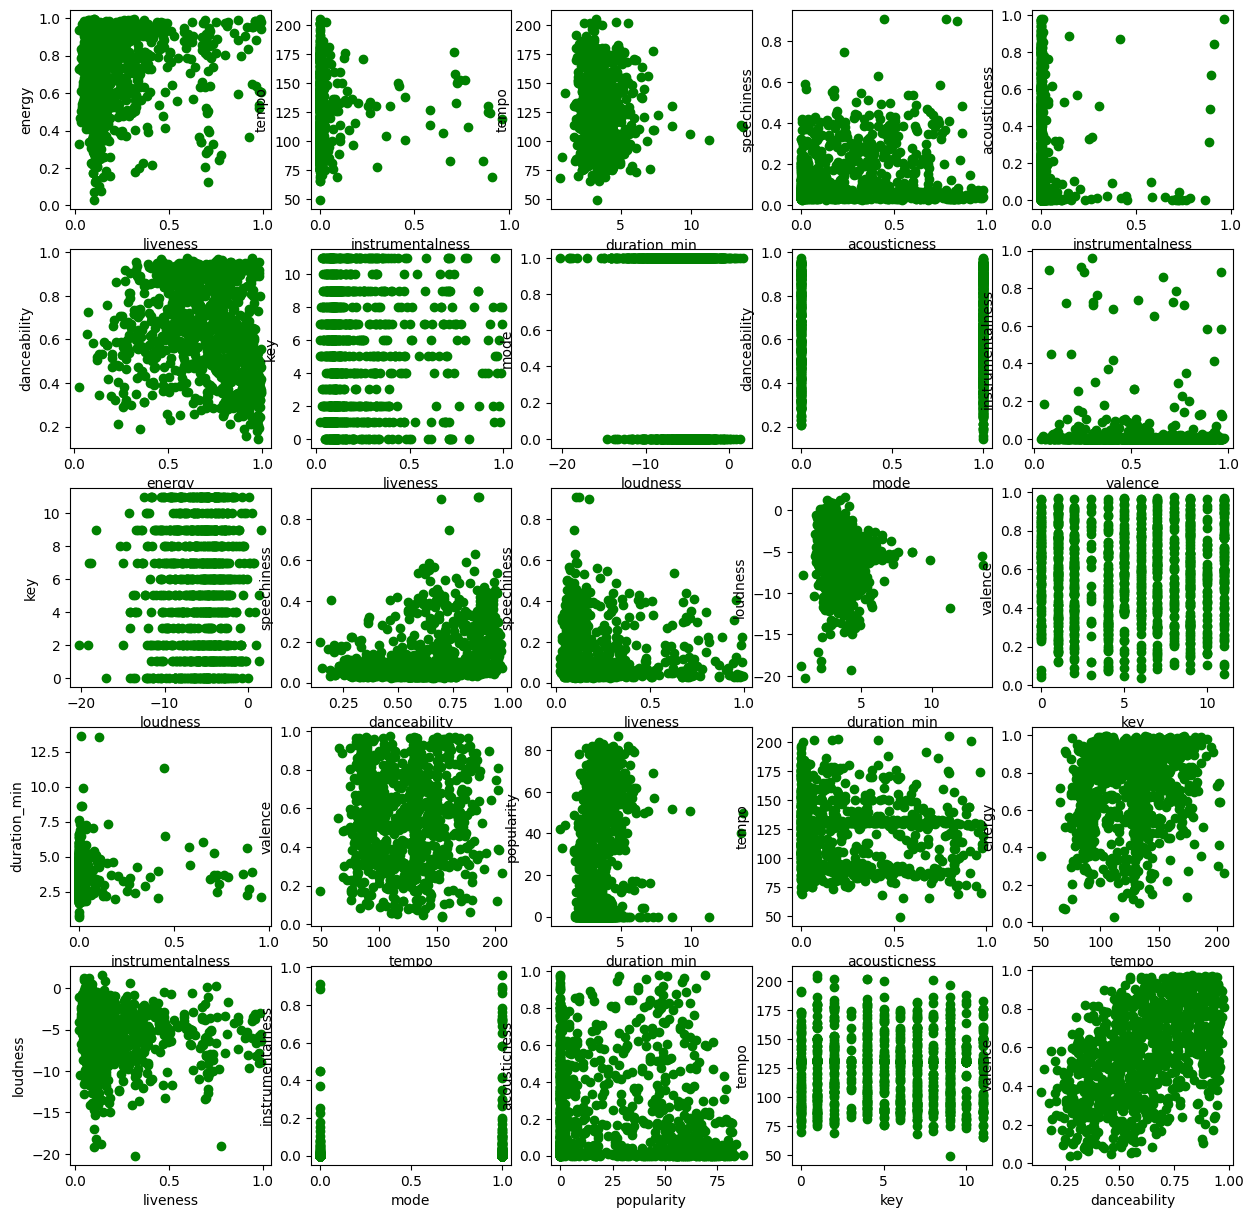

In [111]:
pairs = get_pairs(data_num)

fig, axs = plt.subplots(5, 5)
i = 0
for rows in axs:
    for ax in rows:
        ax.scatter(data_num[pairs[i][0]], data_num[pairs[i][1]], c='g')
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        i+=1
plt.show()

Computing the correlation between each feature (Calculando a correlação entre cada feature).

In [113]:
data_corr = data_num.corr()
data_corr

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
popularity,1.000000,-0.384378,0.133587,0.012433,-0.146461,0.021448,-0.337709,-0.218468,0.015894,0.053100,-0.077873,-0.019295,0.221361
danceability,-0.384378,1.000000,-0.218017,-0.008203,0.196419,-0.010944,0.371626,0.251087,-0.110093,-0.240471,0.487388,-0.096490,-0.408243
energy,0.133587,-0.218017,1.000000,0.002421,0.607230,-0.119448,0.006405,-0.616818,0.007258,0.133774,0.176669,0.158513,0.095979
key,0.012433,-0.008203,0.002421,1.000000,-0.026120,-0.120825,-0.026196,0.013692,0.015681,0.026699,0.017331,-0.020200,-0.018467
loudness,-0.146461,0.196419,0.607230,-0.026120,1.000000,-0.124208,0.160003,-0.309100,-0.108615,-0.062711,0.201220,0.103914,-0.128506
mode,0.021448,-0.010944,-0.119448,-0.120825,-0.124208,1.000000,-0.004778,0.079664,0.054032,0.006375,-0.013359,0.027009,-0.082533
speechiness,-0.337709,0.371626,0.006405,-0.026196,0.160003,-0.004778,1.000000,0.147949,-0.082213,-0.021417,0.183768,-0.023927,-0.256856
acousticness,-0.218468,0.251087,-0.616818,0.013692,-0.309100,0.079664,0.147949,1.000000,-0.033782,0.015929,-0.078716,-0.096575,-0.165260
instrumentalness,0.015894,-0.110093,0.007258,0.015681,-0.108615,0.054032,-0.082213,-0.033782,1.000000,-0.011696,-0.068299,0.010875,0.074361
liveness,0.053100,-0.240471,0.133774,0.026699,-0.062711,0.006375,-0.021417,0.015929,-0.011696,1.000000,-0.172257,0.060445,0.166861


Applying a condition to view only correlations above a threshold and different from 1 (Aplicando uma condição para visualizar apenas as correlações acima de um threshold e diferente de 1).

In [115]:
mask = (abs(data_corr) > .4) & (abs(data_corr) != 1)
data_corr.where(mask).stack().sort_values(ascending=False)

energy        loudness        0.607230
loudness      energy          0.607230
valence       danceability    0.487388
danceability  valence         0.487388
duration_min  danceability   -0.408243
danceability  duration_min   -0.408243
energy        acousticness   -0.616818
acousticness  energy         -0.616818
dtype: float64

Plotting the heatmap with the correlation between all features (Plotando o heatmap com a correlação entre todas as features).

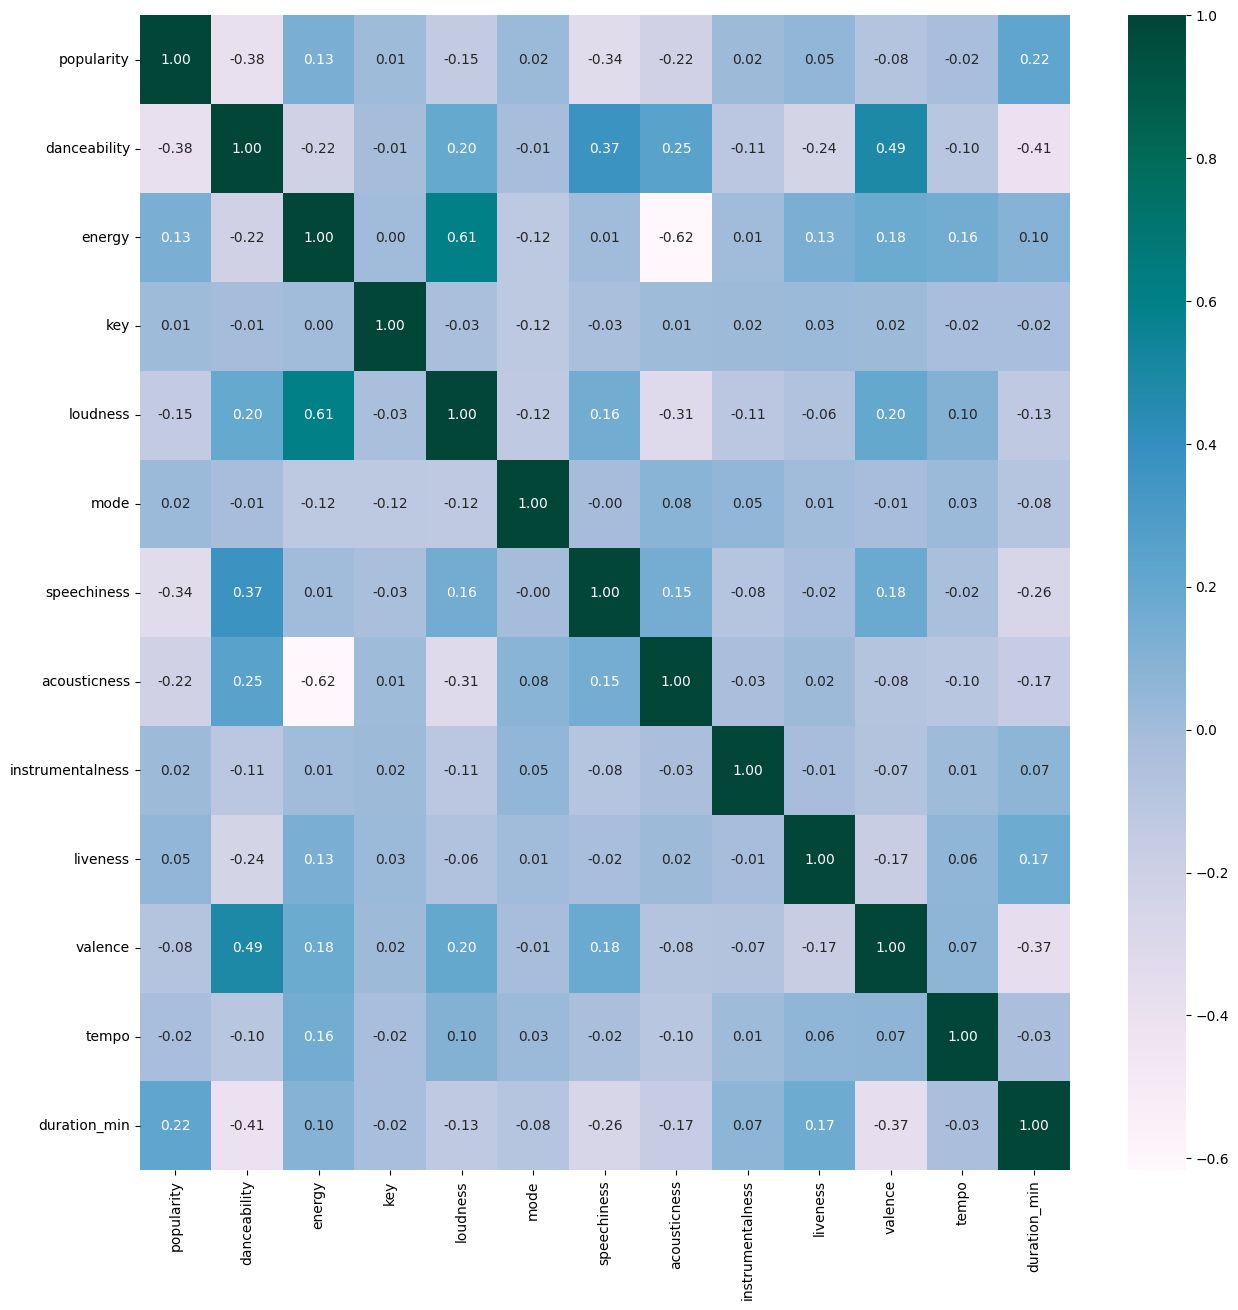

In [117]:
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='PuBuGn')
plt.show()

<a name="3.1"></a>
### Curse of Dimensionality (Maldição da Dimensionalidade)
**[EN-US]**

**This is not the case with this dataset, because it has relatively few dimensions!** When we increase the number of dimensions on a dataset, the volume it occupies expands exponentially. When dimensionality increases, data points that were close together in lower dimensions become increasingly separated. Just imagine a cube becoming a hypercube; its corners move further away from its center and make it more empty inside. This growing emptiness is what we refer to as data sparsity. In high-dimensional spaces, distance metrics encounter significant challenges. Metrics like Euclidean Distance, which are useful for measuring proximity between data points in lower dimensions, lose their effectiveness.

One of the problems of the curse of dimensionality is overfitting, finding patterns in large datasets and that processing high-dimensional data requires a lot of computational power and memory.

With dimensionality reduction, we can visualize our dataset in a 2D or 3D graph, for example, to see possible relationships. When we have a representation in a high-dimensional space ($d$-dimensional), we can use an algorithm like `PCA` to obtain a representation with fewer dimensions, with 2 or 3 variables. In our vector space with fewer dimensions, the data points may be clustered. We may also find other relationships between our data that we did not expect.

**[PT-BR]**

**Não é o caso desse dataset, porque ele têm relativamente poucas dimensões!** Quando aumentamos o número de dimensões em um dataset, o seu volume se expande exponencialmente. Quando a dimensionalidade aumenta, os data points que estavam próximos em dimensões inferiores se tornam cada vez mais separados. Imagine um cubo se tornando um hipercubom seus cantos se afastam mais do centro e o tornam mais vazio por dentro. Esse vazio crescente é o que chamamos de `data sparsity`. Em espaços de alta dimensão, as métricas de distância encontram desafios significativos. Métricas como distâncias euclidianas ou de Manhattan, que são úteis para medir a proximidade entre pontos de dados em dimensões inferiores, perdem sua eficácia.

Um dos problemas da maldição da dimensionalidade é o overfitting, encontrar padrões em grandes dataset e que o processamento de dados de alta dimensionalidade exige muito poder computacional e memória.

Com a redução de dimensionalidade, podemos visualizar nosso dataset em um gráfico 2D, ou 3D, por exemplo, para ver possíveis relações. Quando temos uma representação em um espaço alto dimensal ($d$-dimensional), podemos usar um algoritmo como o `PCA` para obter uma representação com menos dimensões, com 2 ou 3 variáveis. No nosso espaço vetorial com menos dimensões, os data points podem estar clusterizados. Podemos também encontrar outras relações entre nossos dados que não esperávamos.

<a name="3.1.1"></a>
#### PCA (Principal Component Analysis)
**[EN-US]**

The PCA (Principal Component Analysis) algorithm is used for dimensionality reduction, to visualize high-dimensional vectors and matrices. It tries to combine the variances between the variables, capturing as much information as possible in the original examples. We find 1 or more principal components (new $Z$ axes), so that when measuring their data coordinates on the new axis, we still have very useful information. So, first we will find a set of uncorrelated features from our data and then we project our data into a space with a lower dimension, trying to retain as much information as possible, as much variance as possible.
* **Eigenvector or Principal Component**: uncorrelated features of our data. The eigenvectors of our data's covariance matrix give us directions about uncorrelated features.
* **Eigenvalue or Explained Variance**: the amount of information retained by each new feature. These are the variances of our data in each of the new features. Each eigenvalue has a corresponding eigenvector and the eigenvalue tells us how much explained variance there is in each eigenvector (principal component).

Using the `exaplained_variance_ratio_` function, we query how much the principal components explain the variance in our data, whether or not projecting the data onto these axes helps to retain most of the variability or most of the information in the original dataset. The higher the explained variance, the more information the feature is capturing.

**[PT-BR]**

O algoritmo PCA (Principal Component Analysis) é utilizado para redução de dimensionalidade, para visualizar vetores e matrizes de alta dimensão. Ele tenta combinar as variâncias entre as variáveis, capturando o máximo de informação possível nos exemplos originais. Encontramos 1 ou mais principal components (novos eixos $Z$), para que, ao medir suas coordenadas de dados no novo eixo, ainda tenhamos informações muito úteis. Então, primeiro encontraremos um set de features não correlacionadas dos nossos dados e, em seguida, projetamos nossos dados em um espaço com uma dimensão menor, tentando reter o máximo de informações possível, o máximo de variância possível.
* **Autovetor ou Principal Component**: features não correlacionadas dos nossos dados. Os autovetores da nossa matriz de covariância dos nossos dados, nos fornece direções sobre features não correlacionadas.
* **Autovalor ou Variância Explicada**: a quantidade de informação retida por cada nova feature. São as variâncias dos nossos dados em cada uma das novas features. Cada autovalor tem um autovetor correspondente e o autovalor nos diz quanta explained variance há em cada autovetor (principal component).

Utilizando a função `exaplained_variance_ratio_`, nós consultamos o quanto os principal components explicam a variância em nossos dados, se a projeção dos dados nesses eixos ajudam ou não a reter a maior parte da variabilidade ou a maioria das informações no dataset original. Quando maior a explained variance, mais informação a feature está capturando.

Applying PCA with only 3 principal components ($Z$ axes) to the dataset (Aplicando o PCA com apenas 3 principal components (eixos $Z$) ao dataset).

In [121]:
# Applying normalization to facilitate PCA computation. Detailed explanation of normalization in notebooks `03_preprocessing.ipynb`
# Aplicando a normalização para facilitar a computação do PCA. Explicação detalhada sobre a normalização no notebooks `03_preprocessing.ipynb`
data_num_norm = StandardScaler().fit_transform(data_num)

# Instantiating PCA with 3 principal components
# Instânciando o PCA com 3 principal components
pca = PCA(n_components=3)
# Fitting PCA to our original scaled dataset
# Ajustando o PCA ao nosso dataset original escalado
data_num_trans = pca.fit_transform(data_num_norm)
# Creating a dataframe with the matrix transformed into only 3 features
# Criando um dataframe com a matriz transformada em apenas 3 features
df_pca = pd.DataFrame(
    data_num_trans,
    columns=['principal_component_1', 'principal_component_2', 'principal_component_3']
)
print(f'Explained variance: {pca.explained_variance_ratio_}')

Explained variance: [0.19376059 0.16727203 0.08894097]


Plotting the dataset in 2D after PCA transformation (Plotando o dataset em 2D após a transformação do PCA).

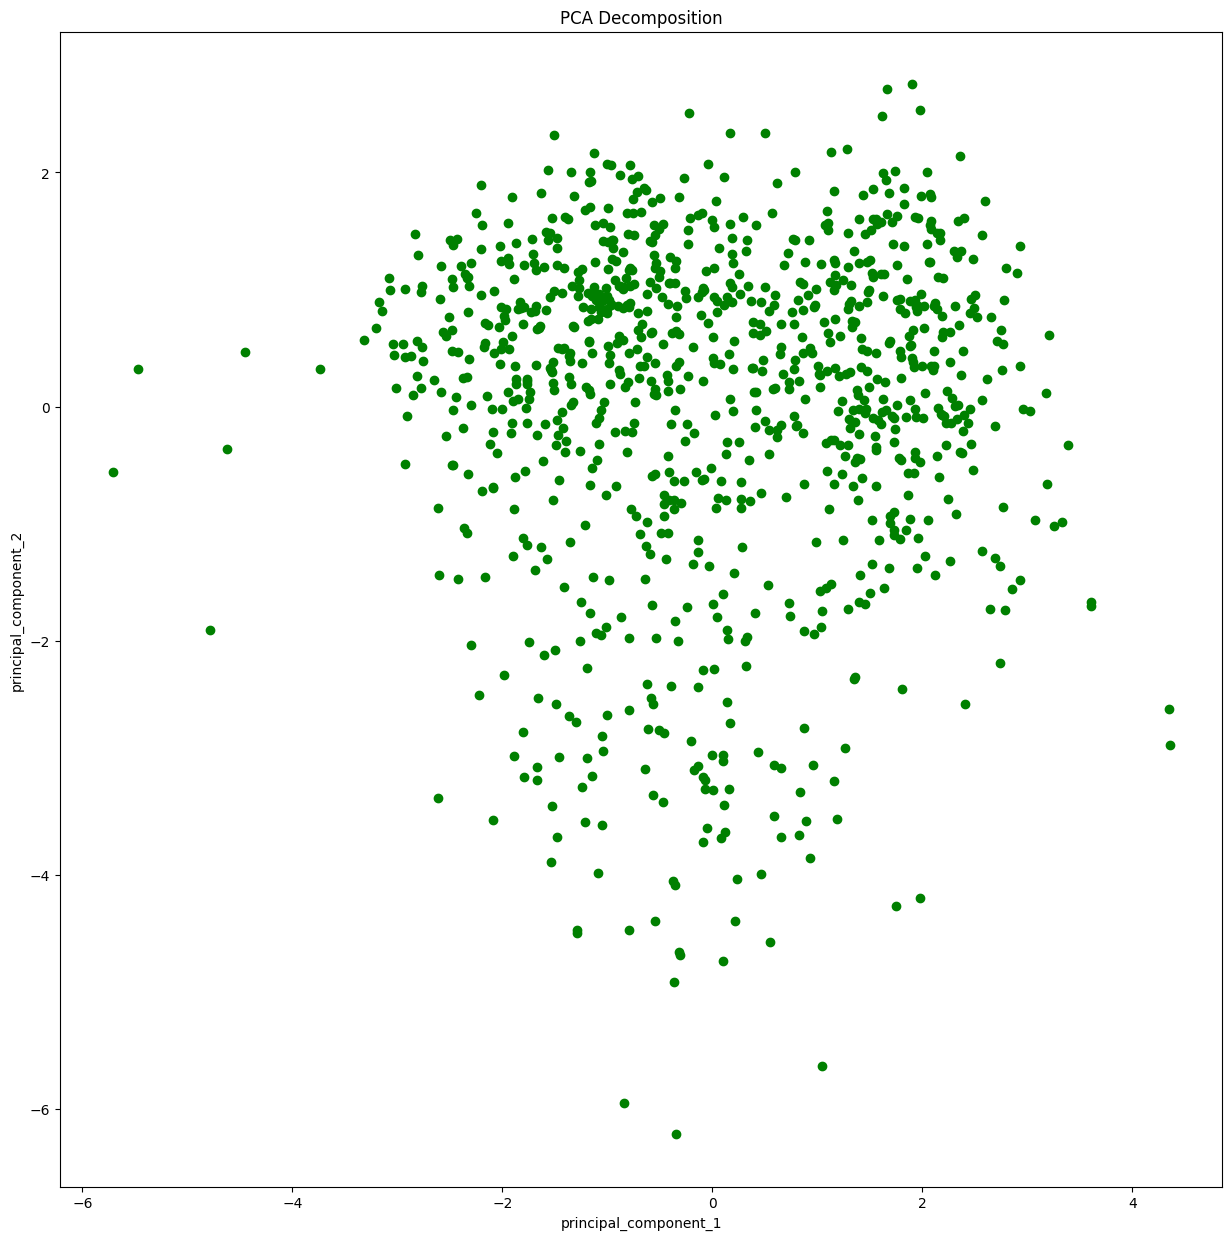

In [123]:
plt.scatter(df_pca['principal_component_1'],
            df_pca['principal_component_2'],
            c='g')
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA Decomposition')
plt.show()

Plotting the dataset in 3D after PCA transformation (Plotando o dataset em 3D após a transformação do PCA).

In [125]:
fig = px.scatter_3d(df_pca,
                    x='principal_component_1',
                    y='principal_component_2',
                    z='principal_component_3',
                    width=800,
                    height=600).update_traces(marker=dict(color='green'))
fig.show()